

# O que é a LeNet?

A LeNet é uma arquitetura de rede neural convolucional (CNN) desenvolvida em 1998 por Yann LeCun, Leon Bottou, Yoshua Bengio e Patrick Haffner. É uma das primeiras CNNs criadas e foi projetada para reconhecer caracteres escritos a mão, comumente usados em códigos postais nos Estados Unidos.

# Como a LeNet foi criada?

A LeNet foi desenvolvida no início dos anos 90, quando LeCun trabalhava para o Bell Labs nos EUA. Ela foi inspirada na arquitetura LeNet-5, que consistia em sete camadas (duas convolucionais, duas de subamostragem e três densas), e foi treinada no conjunto de dados MNIST de dígitos manuscritos. A LeNet-5 é considerada a primeira CNN bem-sucedida e foi um marco no campo do reconhecimento de padrões em imagens.

# Vantagens da LeNet

A LeNet foi uma das primeiras arquiteturas a usar a técnica de convolução em camadas de processamento de imagem. Com suas camadas convolucionais e de subamostragem, a LeNet foi capaz de extrair características importantes das imagens, tornando-a mais eficiente e precisa na tarefa de reconhecimento de caracteres manuscritos. Isso permitiu que a LeNet superasse outros modelos de aprendizado de máquina tradicionais.

# Arquitetura da LeNet

A arquitetura da LeNet-5 consiste em sete camadas, incluindo:

* Camada de entrada: Esta camada recebe a imagem original em preto e branco do 
tamanho 32x32 pixels.

* Camada convolucional: Esta camada usa filtros para extrair características importantes da imagem.

* Camada de subamostragem: Esta camada reduz a dimensionalidade da imagem, diminuindo sua resolução e removendo o ruído.

* Outra camada convolucional: Esta camada extrai mais características da imagem.

* Outra camada de subamostragem: Esta camada reduz ainda mais a dimensionalidade da imagem.

* Camada densa: Esta camada recebe as características extraídas e as transforma em um vetor de recursos.

* Camada de saída: Esta camada usa um classificador softmax para atribuir uma probabilidade a cada classe.

A arquitetura da LeNet foi revolucionária em sua época e influenciou muitas outras arquiteturas de CNNs que vieram depois dela.

![image](https://www.philschmid.de/static/blog/getting-started-with-cnn-by-calculating-lenet-layer-manually/lenet-5.svg)

#Sobre o Conjunto de Dados

https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

O Conjunto de Dados de Câncer de Pele Melanoma contém 10000 imagens. O câncer de pele melanoma é um câncer mortal, detecção precoce e cura podem salvar muitas vidas. Este conjunto de dados será útil para o desenvolvimento de modelos de aprendizado profundo para classificação precisa de melanoma. O conjunto de dados consiste em 9600 imagens para treinar o modelo e 1000 imagens para avaliação do modelo.

In [ ]:
import os

# Lendo as crendenciais para download do dataset
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

# Download do dataset
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

# Descompressao do dataset
!unzip /content/melanoma-skin-cancer-dataset-of-10000-images.zip -d /content/kaggle/

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: /content/kaggle/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  infla

In [ ]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle


class MelanomaClass:
    def __init__(self):
        self.class_names = ['benign', 'malignant']
        self.class_names_label = {class_name:i for i, class_name in enumerate(self.class_names)}
        self.nb_classes = len(self.class_names)
        self.IMAGE_SIZE = 32
        self.model = None
        self.history = None

    def load_data(self):
        datasets = [os.path.join('kaggle', 'melanoma_cancer_dataset', 'train'), os.path.join('kaggle', 'melanoma_cancer_dataset', 'test')]
        output = []
        for dataset in datasets:        
            images = []
            labels = []        

            for folder in os.listdir(dataset):
                label = self.class_names_label[folder]
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    img_path = os.path.join(os.path.join(dataset, folder), file)
                    try:
                        image = cv2.imread(img_path)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        image = cv2.resize(image, (self.IMAGE_SIZE, self.IMAGE_SIZE))
                    except:
                        print(img_path)
                        raise 'Error! Image not read'
                    images.append(image)
                    labels.append(label)
            images = np.array(images, dtype = 'float32')
            labels = np.array(labels, dtype = 'int32')   
            output.append((images, labels))

        return output


    def plot_sample_images(self):
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        for i, class_name in tqdm(enumerate(self.class_names)):
            files = os.listdir(os.path.join('kaggle', 'melanoma_cancer_dataset', 'train', class_name))
            file_path = os.path.join('kaggle', 'melanoma_cancer_dataset', 'train', class_name, random.choice(files))
            try:
                image = cv2.imread(file_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            except:
                print(file_path)
                raise 'Error! Image not read'
            if i == 0:
                axes[i].imshow(image)
                axes[i].set_title('Benign')
            else:
                axes[i].imshow(image)
                axes[i].set_title('Malignant')
        plt.show()



    def train(self, batch_size=2, epochs=20, validation_split=0.2):
        (train_images, train_labels), (test_images, test_labels) = self.load_data()
        train_images, train_labels = shuffle(train_images, train_labels)
        train_images = train_images / 255.0 
        test_images = test_images / 255.0

        self.model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(self.IMAGE_SIZE, self.IMAGE_SIZE, 3)),
            tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
            tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
            tf.keras.layers.Dense(120, activation='relu'),
            tf.keras.layers.Flatten(),            
            tf.keras.layers.Dense(84, activation='relu'),
            tf.keras.layers.Dense(2, activation='softmax')
        ])
        checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(
            train_images,
            train_labels,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(test_images, test_labels),
            validation_split=validation_split,
            callbacks=[checkpoint_callback]
            )


    def evaluate(self):
        if self.model is None:
            raise Exception('Model not trained yet.')
        (train_images, train_labels), (test_images, test_labels) = self.load_data()
        test_images = test_images / 255.0
        test_loss = self.model.evaluate(test_images, test_labels)
        return test_loss
    
    def save_model(self):
        self.model.save(os.path.join('model_cnn','cnn_model.h5'), save_format='tf')

    def load_model(self):
        model_ = tf.keras.models.load_model(os.path.join('best_model.h5'))
        return model_

    def predict(self, image_path):
        self.model_ = self.load_model()
        if self.model_ is None:
            raise Exception('Model not trained yet.')
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.IMAGE_SIZE, self.IMAGE_SIZE))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)
        prediction = self.model_.predict(img)
        predicted_class_idx = np.argmax(prediction)
        predicted_class = self.class_names[predicted_class_idx]
        return predicted_class

2it [00:00, 37.29it/s]


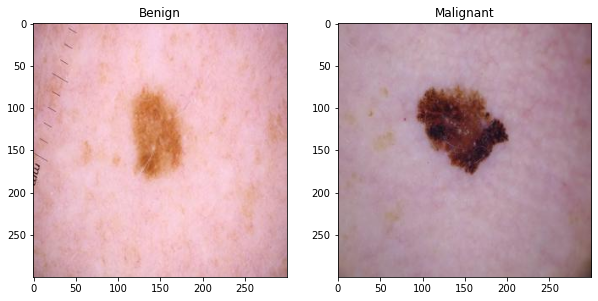

In [ ]:
welds_class = MelanomaClass()
welds_class.plot_sample_images()

In [ ]:
welds_class.train()


100%|██████████| 500/500 [00:00<00:00, 955.31it/s]


Epoch 1/20
4803/4803 [==============================] - 36s 5ms/step - loss: 0.4519 - accuracy: 0.7797 - val_loss: 0.3293 - val_accuracy: 0.8450
Epoch 2/20
4803/4803 [==============================] - 24s 5ms/step - loss: 0.3709 - accuracy: 0.8283 - val_loss: 0.2909 - val_accuracy: 0.8770
Epoch 3/20
4803/4803 [==============================] - 26s 5ms/step - loss: 0.3435 - accuracy: 0.8440 - val_loss: 0.2804 - val_accuracy: 0.8750
Epoch 4/20
4803/4803 [==============================] - 25s 5ms/step - loss: 0.3329 - accuracy: 0.8547 - val_loss: 0.2992 - val_accuracy: 0.8730
Epoch 5/20
4803/4803 [==============================] - 27s 6ms/step - loss: 0.3002 - accuracy: 0.8717 - val_loss: 0.2727 - val_accuracy: 0.8780
Epoch 6/20
4803/4803 [==============================] - 25s 5ms/step - loss: 0.2887 - accuracy: 0.8773 - val_loss: 0.2708 - val_accuracy: 0.8850
Epoch 7/20
4803/4803 [==============================] - 26s 5ms/step - loss: 0.2721 - accuracy: 0.8842 - val_loss: 0.2580 - val_ac

In [ ]:
welds_class.evaluate()


100%|██████████| 500/500 [00:00<00:00, 948.52it/s]


32/32 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8820


[0.3490288555622101, 0.8820000290870667]

In [ ]:
!wget https://static.mundoeducacao.uol.com.br/mundoeducacao/conteudo_legenda/3a170408a6ae4fe41dcd328d983f461a.jpg

--2023-03-28 21:54:51--  https://static.mundoeducacao.uol.com.br/mundoeducacao/conteudo_legenda/3a170408a6ae4fe41dcd328d983f461a.jpg
Resolving static.mundoeducacao.uol.com.br (static.mundoeducacao.uol.com.br)... 200.147.4.47
Connecting to static.mundoeducacao.uol.com.br (static.mundoeducacao.uol.com.br)|200.147.4.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130915 (128K) [image/jpeg]
Saving to: ‘3a170408a6ae4fe41dcd328d983f461a.jpg’

3a170408a6ae4fe41dc 100%[===================>] 127.85K   318KB/s    in 0.4s    

2023-03-28 21:54:53 (318 KB/s) - ‘3a170408a6ae4fe41dcd328d983f461a.jpg’ saved [130915/130915]



In [ ]:
welds_class.predict('/content/3a170408a6ae4fe41dcd328d983f461a.jpg')

1/1 [==============================] - 0s 154ms/step


'malignant'

In [ ]:
!wget https://mavaro.com.br/blog/wp-content/uploads/2022/01/03.jpg --no-check-certificate

--2023-03-28 21:55:18--  https://mavaro.com.br/blog/wp-content/uploads/2022/01/03.jpg
Resolving mavaro.com.br (mavaro.com.br)... 179.188.11.240
Connecting to mavaro.com.br (mavaro.com.br)|179.188.11.240|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 145507 (142K) [image/jpeg]
Saving to: ‘03.jpg’

03.jpg              100%[===================>] 142.10K   240KB/s    in 0.6s    

2023-03-28 21:55:20 (240 KB/s) - ‘03.jpg’ saved [145507/145507]



In [ ]:
welds_class.predict('/content/03.jpg')

1/1 [==============================] - 0s 125ms/step


'benign'